# import libraries

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np

# Read the images data

In [29]:
# Read the data From the provided paths


def load_images_from_folder(folder):
    images = {}
    n=0
    for subfolder in ['REAL', 'FAKE']:
        path = os.path.join(folder, subfolder)
        images[subfolder] = []
        for filename in os.listdir(path):
            img = cv2.imread(os.path.join(path, filename))
            if img is not None:
                images[subfolder].append(img)
                
                print(f"Loaded image: {os.path.join(path, filename)}", f"{n}")
                n+=1
            else:
                print(f"Unable to load image: {os.path.join(path, filename)}")
    return images

train_images = load_images_from_folder(r'D:\collage\3\2\Pattern\New folder\AI 2\tarin')
test_images = load_images_from_folder(r'D:\collage\3\2\Pattern\New folder\AI 2\test')

Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (10).jpg 0
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (2).jpg 1
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (3).jpg 2
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (4).jpg 3
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (5).jpg 4
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (6).jpg 5
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (7).jpg 6
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (8).jpg 7
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000 (9).jpg 8
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0000.jpg 9
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0001 (10).jpg 10
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2\tarin\REAL\0001 (4).jpg 11
Loaded image: D:\collage\3\2\Pattern\New folder\AI 2

# start the Dataset Exploration

### DataSet Folder and Number of images 

In [30]:
# number of categories in each folder
print("Number of categories in Train folder: ",len(train_images))
print("Number of categories in Test folder:",len(test_images))

Number of categories in Train folder:  2
Number of categories in Test folder: 2


In [31]:
# Listing Directories of both categories

path_to_images_1 = r'D:\collage\3\2\Pattern\New folder\AI 2\test'
path_to_images_2 = r'D:\collage\3\2\Pattern\New folder\AI 2\tarin'

# Get a list of all files and directories in the first path
contents_1 = os.listdir(path_to_images_1)

# Loop through each item in the list
for item in contents_1:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(path_to_images_1, item)):
        print("Found directory in test folder:", item)

# Get a list of all files and directories in the second path
contents_2 = os.listdir(path_to_images_2)

# Loop through each item in the list
for item in contents_2:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(path_to_images_2, item)):
        print("Found directory in train folder:", item)

Found directory in test folder: FAKE
Found directory in test folder: REAL
Found directory in train folder: FAKE
Found directory in train folder: REAL


In [32]:
# number of images in each category

def count_images_in_folder(folder):
    for subfolder in ['REAL', 'FAKE']:
        path = os.path.join(folder, subfolder)
        image_count = len([name for name in os.listdir(path) if os.path.isfile(os.path.join(path, name))])
        print(f"Folder: {subfolder}, Number of Images: {image_count}")

# For train folder
print("For Train Folder:")
count_images_in_folder(r'D:\collage\3\2\Pattern\New folder\AI 2\tarin')

# For test folder
print("\nFor Test Folder:")
count_images_in_folder(r'D:\collage\3\2\Pattern\New folder\AI 2\test')

For Train Folder:
Folder: REAL, Number of Images: 50
Folder: FAKE, Number of Images: 50

For Test Folder:
Folder: REAL, Number of Images: 50
Folder: FAKE, Number of Images: 50


### display 5 random samples of the data

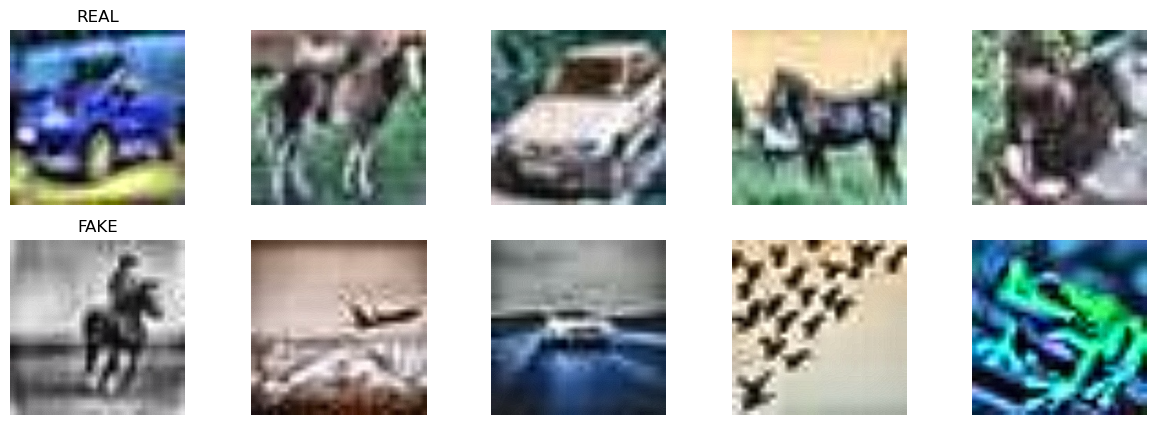

In [33]:
# display 5 random samples of the data

def visualize_images(images, num_samples=5):
    fig, axes = plt.subplots(2, num_samples, figsize=(15, 5))

    for i, (label, img_list) in enumerate(images.items()):
        sample_images = random.sample(img_list, num_samples)
        for j, img in enumerate(sample_images):
            ax = axes[i][j]
            ax.imshow(img)
            ax.axis('off')
            if j == 0:
                ax.set_title(label)

    plt.show()

visualize_images(train_images)

###  Image Statistics Exploration

In [34]:
# Image Statistics Exploration

def compute_image_statistics(images):
    # Initialize lists to store statistics
    mean_pixel_values = []
    std_dev_pixel_values = []
    image_sizes = []

    # Compute statistics for each image
    for image_list in images.values():
        for img in image_list:
            # Compute mean and standard deviation of pixel values
            mean = np.mean(img, axis=(0, 1))
            std_dev = np.std(img, axis=(0, 1))
            mean_pixel_values.append(mean)
            std_dev_pixel_values.append(std_dev)

            # Get image size (width, height)
            height, width, _ = img.shape
            image_sizes.append((width, height))

    # Convert lists to numpy arrays for easier manipulation
    mean_pixel_values = np.array(mean_pixel_values)
    std_dev_pixel_values = np.array(std_dev_pixel_values)
    image_sizes = np.array(image_sizes)

    # Compute overall mean and standard deviation
    overall_mean = np.mean(mean_pixel_values, axis=0)
    overall_std_dev = np.mean(std_dev_pixel_values, axis=0)

    # Compute min, max, and average image size
    min_size = np.min(image_sizes, axis=0)
    max_size = np.max(image_sizes, axis=0)
    avg_size = np.mean(image_sizes, axis=0)

    return {
        'mean_pixel_values': overall_mean,
        'std_dev_pixel_values': overall_std_dev,
        'min_image_size': min_size,
        'max_image_size': max_size,
        'average_image_size': avg_size
    }

# Compute image statistics for train images
train_stats = compute_image_statistics(train_images)
print("Train Image Statistics:")
print("Mean Pixel Values:", train_stats['mean_pixel_values'])
print("Standard Deviation of Pixel Values:", train_stats['std_dev_pixel_values'])
print("Minimum Image Size (Width, Height):", train_stats['min_image_size'])
print("Maximum Image Size (Width, Height):", train_stats['max_image_size'])
print("Average Image Size (Width, Height):", train_stats['average_image_size'])

Train Image Statistics:
Mean Pixel Values: [112.35709861 127.62579062 127.59387695]
Standard Deviation of Pixel Values: [53.69871682 53.31699471 53.13495988]
Minimum Image Size (Width, Height): [224 224]
Maximum Image Size (Width, Height): [224 224]
Average Image Size (Width, Height): [224. 224.]


In [35]:
# Compute image statistics for test images
test_stats = compute_image_statistics(test_images)
print("\nTest Image Statistics:")
print("Mean Pixel Values:", test_stats['mean_pixel_values'])
print("Standard Deviation of Pixel Values:", test_stats['std_dev_pixel_values'])
print("Minimum Image Size (Width, Height):", test_stats['min_image_size'])
print("Maximum Image Size (Width, Height):", test_stats['max_image_size'])
print("Average Image Size (Width, Height):", test_stats['average_image_size'])


Test Image Statistics:
Mean Pixel Values: [116.01597676 126.60399354 127.15498346]
Standard Deviation of Pixel Values: [55.86035233 54.75106717 55.3661715 ]
Minimum Image Size (Width, Height): [224 224]
Maximum Image Size (Width, Height): [224 224]
Average Image Size (Width, Height): [224. 224.]


### image Quality checks and data quality

In [36]:
def image_quality_checks(images, num_samples=100):
    quality_issues = {'REAL': {'Low Quality': 0, 'Blurry': 0, 'High Quality': 0, 'Overexposed': 0},
                      'FAKE': {'Low Quality': 0, 'Blurry': 0, 'High Quality': 0, 'Overexposed': 0}}
    total_images_sampled = {'REAL': 0, 'FAKE': 0}

    for label, img_list in images.items():
        # Randomly select num_samples images
        random_images = random.sample(img_list, min(num_samples, len(img_list)))
        total_images_sampled[label] = min(num_samples, len(img_list))

        for img in random_images:
            # Check image resolution
            if img.shape[0] < 100 or img.shape[1] < 100:
                quality_issues[label]['Low Quality'] += 1
                continue
            
            # Check bluriness
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            laplacian_var = cv2.Laplacian(gray_img, cv2.CV_64F).var()
            if laplacian_var < 100:
                quality_issues[label]['Blurry'] += 1
            
            # Check for high quality
            # You can define your criteria for high quality, such as image sharpness, contrast, etc.
            # For example, if the Laplacian variance is above a certain threshold, you might consider it high quality.
            if laplacian_var > 500:
                quality_issues[label]['High Quality'] += 1

    # Calculate percentage of quality issues for each label
    percentages = {}
    for label, issues in quality_issues.items():
        total_samples = total_images_sampled[label]
        percentages[label] = {'Low Quality': (issues['Low Quality'] / total_samples) * 100,
                              'Blurry': (issues['Blurry'] / total_samples) * 100,
                              'High Quality': (issues['High Quality'] / total_samples) * 100}

    return percentages


# Example dictionary containing images for both classes
train_images = {
    'REAL': [np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8) for _ in range(50)],
    'FAKE': [np.random.randint(0, 255, (100, 100, 3), dtype=np.uint8) for _ in range(50)]
}

# Function call
percentages = image_quality_checks(train_images, num_samples=50)

# Print all results
print("Percentage of Quality Issues:")
for label, quality in percentages.items():
    print(f"{label}:")
    for issue, percentage in quality.items():
        print(f"- {issue}: {percentage:.2f}%")

Percentage of Quality Issues:
REAL:
- Low Quality: 0.00%
- Blurry: 0.00%
- High Quality: 100.00%
FAKE:
- Low Quality: 0.00%
- Blurry: 0.00%
- High Quality: 100.00%


In [37]:
# data quality (Illumination, LowResolution , HighResolotion, etc) on sample of the data

def analyze_data_quality(images):
    for category, imgs in images.items():
        print(f"Category: {category}")
        for idx, img in enumerate(imgs[:2], 1):
            print(f"Image {idx}:")
            # Check image properties
            height, width, channels = img.shape
            resolution = (width, height)
            illumination = np.mean(img)
            print(f"Resolution: {resolution}")
            print(f"Illumination (mean pixel value): {illumination}")
            # Check if image is grayscale or color
            if channels == 1:
                print("Image is grayscale.")
            else:
                print("Image is color.")
            # Check if image is low or high resolution
            if min(resolution) <= 64:
                print("Image is low resolution.")
            elif min(resolution) >= 1024:
                print("Image is high resolution.")
            else:
                print("Image resolution is moderate.")
            # Check if illumination is low or high
            if illumination <= 50:
                print("Image has low illumination.")
            elif illumination >= 200:
                print("Image has high illumination.")
            else:
                print("Image illumination is moderate.")
            print("--------------------")

# train_images and test_images are dictionaries with 'REAL' and 'FAKE' categories
analyze_data_quality(train_images)
analyze_data_quality(test_images)

Category: REAL
Image 1:
Resolution: (100, 100)
Illumination (mean pixel value): 126.8858
Image is color.
Image resolution is moderate.
Image illumination is moderate.
--------------------
Image 2:
Resolution: (100, 100)
Illumination (mean pixel value): 126.94516666666667
Image is color.
Image resolution is moderate.
Image illumination is moderate.
--------------------
Category: FAKE
Image 1:
Resolution: (100, 100)
Illumination (mean pixel value): 126.75493333333333
Image is color.
Image resolution is moderate.
Image illumination is moderate.
--------------------
Image 2:
Resolution: (100, 100)
Illumination (mean pixel value): 126.98953333333333
Image is color.
Image resolution is moderate.
Image illumination is moderate.
--------------------
Category: REAL
Image 1:
Resolution: (224, 224)
Illumination (mean pixel value): 137.8876355229592
Image is color.
Image resolution is moderate.
Image illumination is moderate.
--------------------
Image 2:
Resolution: (224, 224)
Illumination (mean 

In [38]:
# statistics of data quality (Illumination, LowResolution , HighResolotion, etc) for the whole dataset

def analyze_data_quality(images):
    category_stats = {}
    for category, imgs in images.items():
        print(f"Category: {category}")
        category_stats[category] = {
            'num_images': len(imgs),
            'resolution': [],
            'illumination': [],
            'color': {'grayscale': 0, 'color': 0},
            'resolution_quality': {'low': 0, 'moderate': 0, 'high': 0},
            'illumination_quality': {'low': 0, 'moderate': 0, 'high': 0}
        }
        for img in imgs:
            # Check image properties
            height, width, channels = img.shape
            resolution = min(width, height)
            category_stats[category]['resolution'].append(resolution)
            illumination = np.mean(img)
            category_stats[category]['illumination'].append(illumination)
            # Check if image is grayscale or color
            if channels == 1:
                category_stats[category]['color']['grayscale'] += 1
            else:
                category_stats[category]['color']['color'] += 1
            # Check resolution quality
            if resolution <= 64:
                category_stats[category]['resolution_quality']['low'] += 1
            elif resolution >= 1024:
                category_stats[category]['resolution_quality']['high'] += 1
            else:
                category_stats[category]['resolution_quality']['moderate'] += 1
            # Check illumination quality
            if illumination <= 50:
                category_stats[category]['illumination_quality']['low'] += 1
            elif illumination >= 200:
                category_stats[category]['illumination_quality']['high'] += 1
            else:
                category_stats[category]['illumination_quality']['moderate'] += 1
    return category_stats

def display_statistics(stats):
    for category, stat in stats.items():
        print(f"\nCategory: {category}")
        print(f"Number of images: {stat['num_images']}")
        print(f"Average Resolution: {np.mean(stat['resolution']):.2f} (Min: {np.min(stat['resolution'])}, Max: {np.max(stat['resolution'])})")
        print(f"Average Illumination: {np.mean(stat['illumination']):.2f} (Min: {np.min(stat['illumination'])}, Max: {np.max(stat['illumination'])})")
        print(f"Color Distribution: Grayscale - {stat['color']['grayscale']}, Color - {stat['color']['color']}")
        print("Resolution Quality:")
        for quality, count in stat['resolution_quality'].items():
            print(f"- {quality.capitalize()}: {count}")
        print("Illumination Quality:")
        for quality, count in stat['illumination_quality'].items():
            print(f"- {quality.capitalize()}: {count}")

# Assuming train_images and test_images are dictionaries with 'REAL' and 'FAKE' categories
train_stats = analyze_data_quality(train_images)
test_stats = analyze_data_quality(test_images)

print("\nTrain Data Statistics:")
display_statistics(train_stats)

Category: REAL
Category: FAKE
Category: REAL
Category: FAKE

Train Data Statistics:

Category: REAL
Number of images: 50
Average Resolution: 100.00 (Min: 100, Max: 100)
Average Illumination: 127.07 (Min: 126.14013333333334, Max: 128.01593333333332)
Color Distribution: Grayscale - 0, Color - 50
Resolution Quality:
- Low: 0
- Moderate: 50
- High: 0
Illumination Quality:
- Low: 0
- Moderate: 50
- High: 0

Category: FAKE
Number of images: 50
Average Resolution: 100.00 (Min: 100, Max: 100)
Average Illumination: 126.98 (Min: 125.97883333333333, Max: 128.14793333333333)
Color Distribution: Grayscale - 0, Color - 50
Resolution Quality:
- Low: 0
- Moderate: 50
- High: 0
Illumination Quality:
- Low: 0
- Moderate: 50
- High: 0


In [39]:
print("\nTest Data Statistics:")
display_statistics(test_stats)


Test Data Statistics:

Category: REAL
Number of images: 50
Average Resolution: 224.00 (Min: 224, Max: 224)
Average Illumination: 125.09 (Min: 67.33949165603741, Max: 212.11094945790816)
Color Distribution: Grayscale - 0, Color - 50
Resolution Quality:
- Low: 0
- Moderate: 50
- High: 0
Illumination Quality:
- Low: 0
- Moderate: 49
- High: 1

Category: FAKE
Number of images: 50
Average Resolution: 224.00 (Min: 224, Max: 224)
Average Illumination: 121.42 (Min: 82.70346380739795, Max: 163.47084927721087)
Color Distribution: Grayscale - 0, Color - 50
Resolution Quality:
- Low: 0
- Moderate: 50
- High: 0
Illumination Quality:
- Low: 0
- Moderate: 50
- High: 0


# Data Visulization

Train Class Distribution:
{'REAL': 50, 'FAKE': 50}


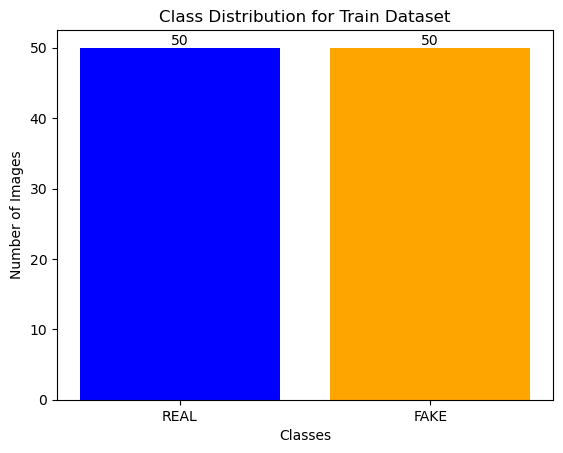

In [40]:
# display the number of images on each folder  (Class Distribution Analysis) (analyze class imbalance)

def class_distribution(images):
    class_counts = {label: len(img_list) for label, img_list in images.items()}
    return class_counts

def plot_class_distribution(class_counts, dataset_name):
    labels = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.bar(labels, counts, color=['blue', 'orange'])
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title(f'Class Distribution for {dataset_name} Dataset')
    
    # Add text labels on each bar
    for i in range(len(labels)):
        plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

    plt.show()

# Compute class distribution for train images
train_class_counts = class_distribution(train_images)
print("Train Class Distribution:")
print(train_class_counts)
plot_class_distribution(train_class_counts, 'Train')


Test Class Distribution:
{'REAL': 50, 'FAKE': 50}


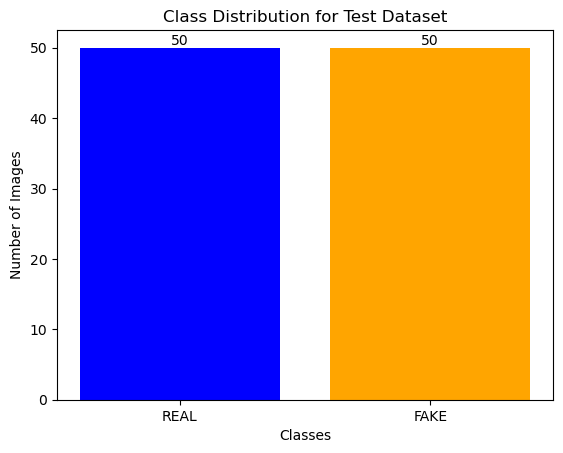

In [41]:
# Compute class distribution for test images
test_class_counts = class_distribution(test_images)
print("\nTest Class Distribution:")
print(test_class_counts)
plot_class_distribution(test_class_counts, 'Test')

Category: REAL
Category: FAKE
Category: REAL
Category: FAKE

Train Data Statistics:

Category: REAL
Number of images: 50
Average Resolution: 10000.00 pixels (Min: 10000 pixels, Max: 10000 pixels)
Average Aspect Ratio: 1.00 (Min: 1.00, Max: 1.00)


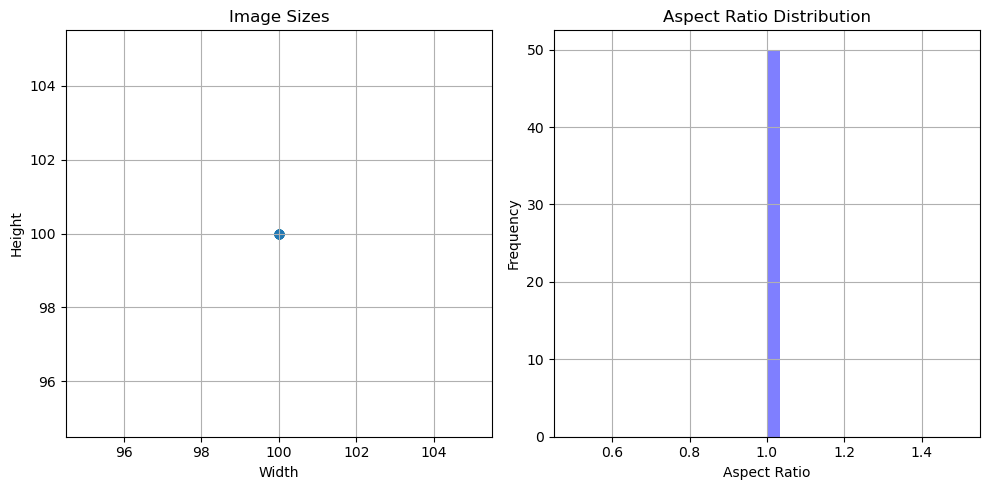


Category: FAKE
Number of images: 50
Average Resolution: 10000.00 pixels (Min: 10000 pixels, Max: 10000 pixels)
Average Aspect Ratio: 1.00 (Min: 1.00, Max: 1.00)


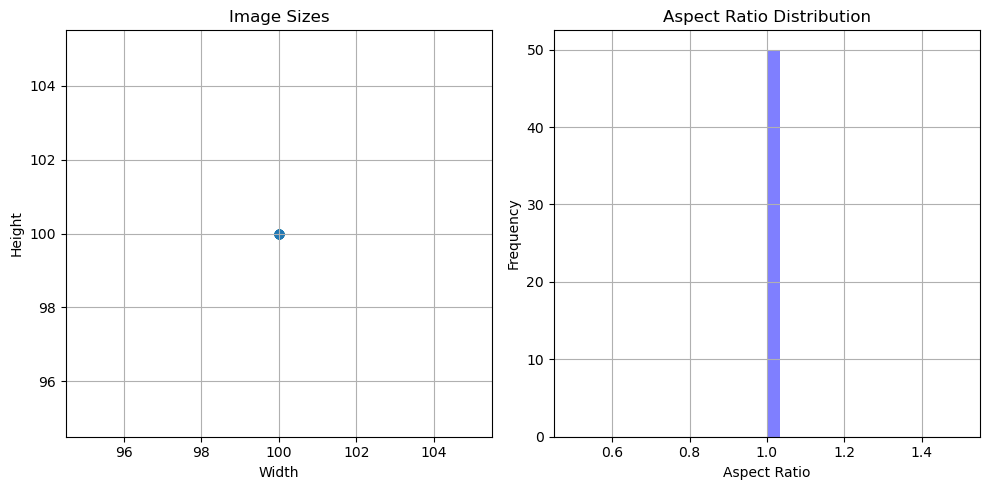

In [42]:
# Image sizes and aspect ratios and comparison using visualization

def analyze_data_quality(images):
    category_stats = {}
    for category, imgs in images.items():
        print(f"Category: {category}")
        category_stats[category] = {
            'num_images': len(imgs),
            'resolution': [],
            'aspect_ratio': [],
        }
        for img in imgs:
            # Check image properties
            height, width, channels = img.shape
            resolution = (width, height)
            category_stats[category]['resolution'].append(resolution)
            aspect_ratio = width / height
            category_stats[category]['aspect_ratio'].append(aspect_ratio)
    return category_stats

def display_statistics(stats):
    for category, stat in stats.items():
        print(f"\nCategory: {category}")
        print(f"Number of images: {stat['num_images']}")
        print(f"Average Resolution: {np.mean([w*h for w, h in stat['resolution']]):.2f} pixels (Min: {min([w*h for w, h in stat['resolution']])} pixels, Max: {max([w*h for w, h in stat['resolution']])} pixels)")
        print(f"Average Aspect Ratio: {np.mean(stat['aspect_ratio']):.2f} (Min: {min(stat['aspect_ratio']):.2f}, Max: {max(stat['aspect_ratio']):.2f})")
        
        # Visualization
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.scatter([w for w, h in stat['resolution']], [h for w, h in stat['resolution']], alpha=0.5)
        plt.title('Image Sizes')
        plt.xlabel('Width')
        plt.ylabel('Height')
        plt.grid(True)

        plt.subplot(1, 2, 2)
        plt.hist(stat['aspect_ratio'], bins=30, alpha=0.5, color='b')
        plt.title('Aspect Ratio Distribution')
        plt.xlabel('Aspect Ratio')
        plt.ylabel('Frequency')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

# Assuming train_images and test_images are dictionaries with 'REAL' and 'FAKE' categories
train_stats = analyze_data_quality(train_images)
test_stats = analyze_data_quality(test_images)

print("\nTrain Data Statistics:")
display_statistics(train_stats)


Test Data Statistics:

Category: REAL
Number of images: 50
Average Resolution: 50176.00 pixels (Min: 50176 pixels, Max: 50176 pixels)
Average Aspect Ratio: 1.00 (Min: 1.00, Max: 1.00)


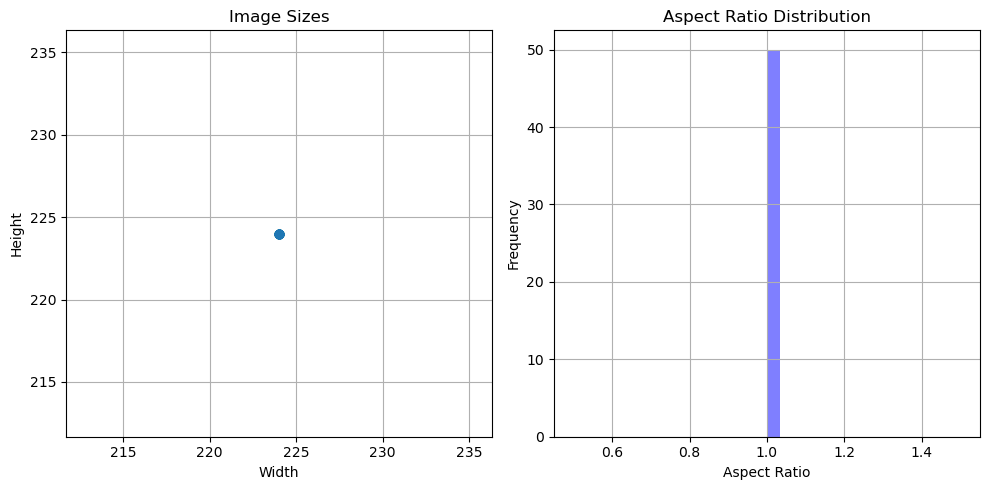


Category: FAKE
Number of images: 50
Average Resolution: 50176.00 pixels (Min: 50176 pixels, Max: 50176 pixels)
Average Aspect Ratio: 1.00 (Min: 1.00, Max: 1.00)


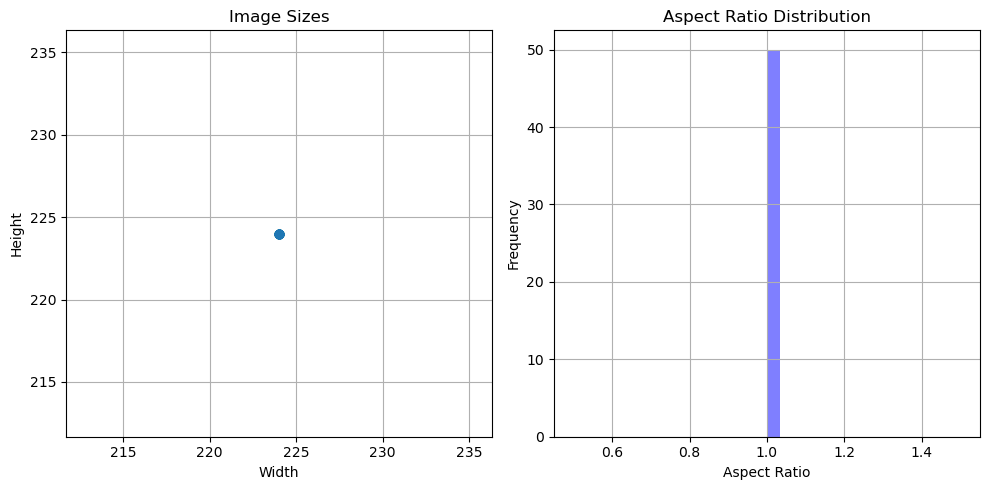

In [43]:
print("\nTest Data Statistics:")
display_statistics(test_stats)

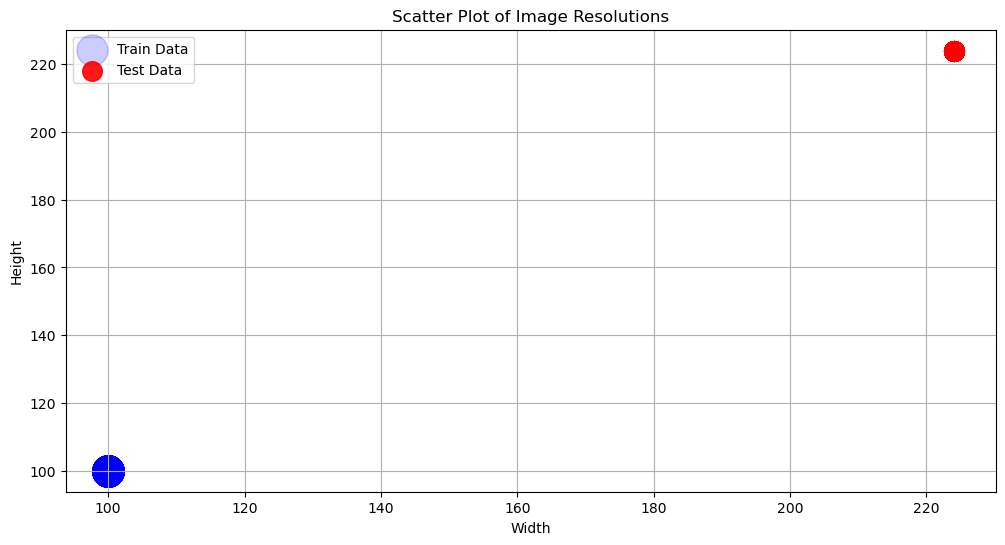

In [44]:
# Plotting Scatter Plot of Image Resolutions for both categories

def get_image_resolutions(images):
    resolutions = []
    for category, imgs in images.items():
        for img in imgs:
            height, width, _ = img.shape
            resolutions.append((width, height))
    return resolutions

# Assuming train_images and test_images are dictionaries with 'REAL' and 'FAKE' categories
train_resolutions = get_image_resolutions(train_images)
test_resolutions = get_image_resolutions(test_images)

# Extracting width and height separately for plotting
train_widths, train_heights = zip(*train_resolutions)
test_widths, test_heights = zip(*test_resolutions)

# Plotting scatter plot for train and test data
plt.figure(figsize=(12, 6))
plt.scatter(train_widths, train_heights, color='blue', alpha=0.2, label='Train Data', s=500)
plt.scatter(test_widths, test_heights, color='red', alpha=0.9, label='Test Data', s=200)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Resolutions')
plt.legend()
plt.grid(True)
plt.show()

Mean Color Distribution for Train Data:


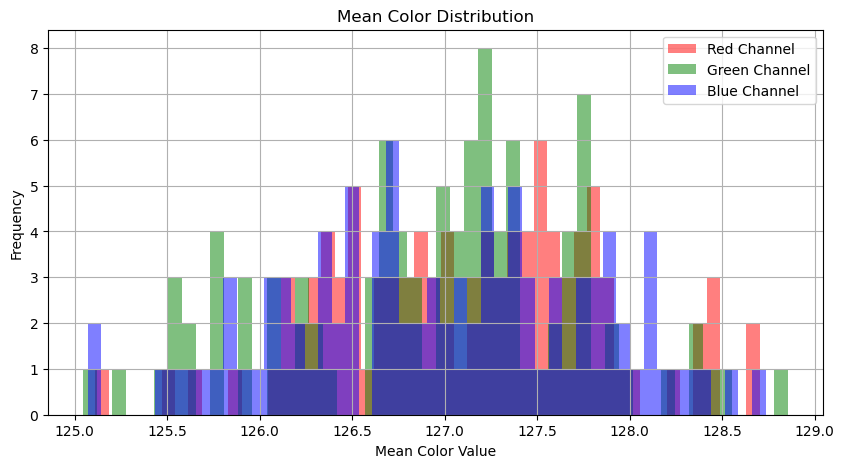

In [45]:
# Plotting the Mean Color Distribution for both categories

def calculate_mean_color(images):
    mean_colors = {'R': [], 'G': [], 'B': []}
    for category, imgs in images.items():
        for img in imgs:
            mean_color = np.mean(img, axis=(0, 1))  # Calculate mean color values
            mean_colors['R'].append(mean_color[2])  # Red channel
            mean_colors['G'].append(mean_color[1])  # Green channel
            mean_colors['B'].append(mean_color[0])  # Blue channel
    return mean_colors

def plot_mean_color_distribution(mean_colors):
    plt.figure(figsize=(10, 5))
    plt.hist(mean_colors['R'], bins=50, color='red', alpha=0.5, label='Red Channel')
    plt.hist(mean_colors['G'], bins=50, color='green', alpha=0.5, label='Green Channel')
    plt.hist(mean_colors['B'], bins=50, color='blue', alpha=0.5, label='Blue Channel')
    plt.xlabel('Mean Color Value')
    plt.ylabel('Frequency')
    plt.title('Mean Color Distribution')
    plt.legend()
    plt.grid(True)
    plt.show()

# Assuming train_images and test_images are dictionaries with 'REAL' and 'FAKE' categories
train_mean_colors = calculate_mean_color(train_images)
test_mean_colors = calculate_mean_color(test_images)

# Plotting mean color distribution for train and test data
print("Mean Color Distribution for Train Data:")
plot_mean_color_distribution(train_mean_colors)

Mean Color Distribution for Test Data:


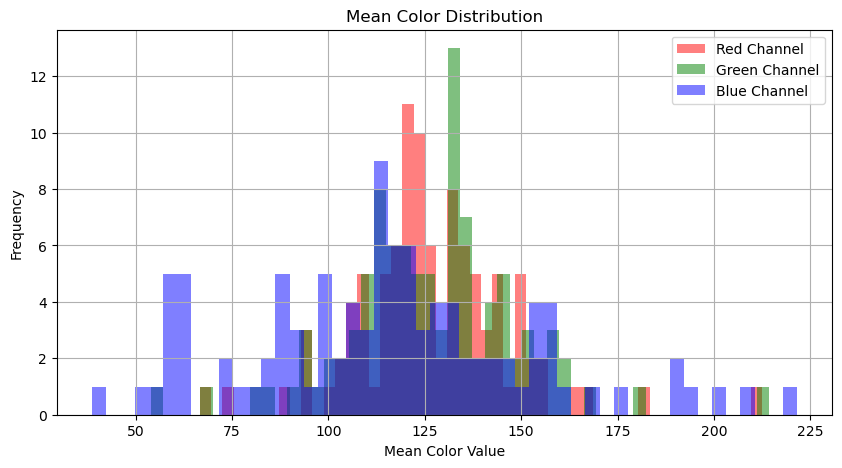

In [46]:
print("Mean Color Distribution for Test Data:")
plot_mean_color_distribution(test_mean_colors)